<a href="https://colab.research.google.com/github/NIVEDITHA0808/fluffy-octo-waffle/blob/master/malaria_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, load_model
from keras.applications.vgg19 import VGG19
from glob import glob
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [4]:
image_size=[224,224]
train_data="/content/drive/MyDrive/Dataset/Train"
test_data="/content/drive/MyDrive/Dataset/Test"

In [5]:
vgg19=VGG19(input_shape=image_size+[3], weights="imagenet", include_top= False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
#storing each layer in an address and setting training off.
for layer in vgg19.layers:
  layer.trainable=False

In [7]:
folders=glob("/content/drive/MyDrive/Dataset/Train/*")

In [8]:
folders

['/content/drive/MyDrive/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Dataset/Train/Uninfected']

In [9]:
x=Flatten()(vgg19.output)

In [10]:
prediction= Dense(len(folders), activation='softmax')(x)
model=Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
#to tell the model what loss funtion and optimization method to use, we use model.compile
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])


In [13]:
#to read the data we use image data generator to import the data from the dataset
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/Train",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/Test",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 134 images belonging to 2 classes.


In [26]:
#fit the model for training and validation
r=model.fit(training_set,validation_data=test_set, epochs=2, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/2
13/13 [==============================] - 7s 553ms/step - loss: 0.4707 - accuracy: 0.7837 - val_loss: 0.5831 - val_accuracy: 0.6866
Epoch 2/2
13/13 [==============================] - 6s 476ms/step - loss: 0.3775 - accuracy: 0.8197 - val_loss: 0.4012 - val_accuracy: 0.7910


In [27]:
if tf.test.gpu_device_name():
  print("default gpu name: {}", format(tf.test.gpu_device_name()))
else:
  print("install gpu")

default gpu name: {} /device:GPU:0


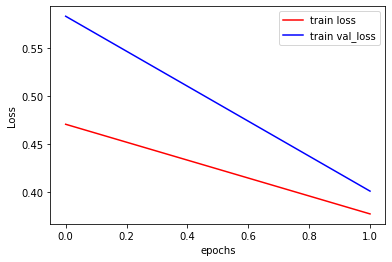

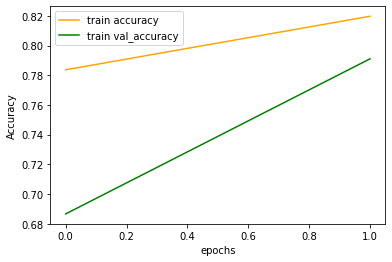

In [28]:
plt.plot(r.history['loss'],"r",label='train loss')
plt.plot(r.history['val_loss'],"b",label='train val_loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(r.history['accuracy'],"orange",label='train accuracy')
plt.plot(r.history['val_accuracy'],"g",label='train val_accuracy')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
y_pred=model.predict(test_set)

5/5 [==============================] - 1s 151ms/step


In [42]:
#probability of it being parasite and uninfected respectively
y_pred

array([[0.695729  , 0.304271  ],
       [0.7488213 , 0.2511787 ],
       [0.634921  , 0.365079  ],
       [0.99594975, 0.00405024],
       [0.950672  , 0.049328  ],
       [0.42323557, 0.57676446],
       [0.6796488 , 0.32035118],
       [0.9409877 , 0.05901233],
       [0.9106295 , 0.08937051],
       [0.99491936, 0.00508062],
       [0.6290082 , 0.3709918 ],
       [0.64370364, 0.3562964 ],
       [0.7161087 , 0.28389132],
       [0.96247435, 0.03752562],
       [0.5370171 , 0.46298292],
       [0.5503223 , 0.44967774],
       [0.34558946, 0.6544105 ],
       [0.7909326 , 0.2090674 ],
       [0.37598157, 0.62401843],
       [0.46109512, 0.5389049 ],
       [0.79566455, 0.20433544],
       [0.7894642 , 0.21053576],
       [0.6907908 , 0.3092093 ],
       [0.9343201 , 0.06567988],
       [0.40392426, 0.5960757 ],
       [0.9323911 , 0.06760889],
       [0.5939139 , 0.4060861 ],
       [0.6173523 , 0.38264772],
       [0.9445721 , 0.05542787],
       [0.75917405, 0.24082598],
       [0.

In [43]:
# we need the max in the matrix
y_pred=np.argmax(y_pred,axis=1)

In [44]:
#0: infected, 1: uninfected
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

In [33]:
model.save('model_vgg19.h5')

In [34]:
model=load_model("model_vgg19.h5")

In [35]:
img=image.load_img("/content/drive/MyDrive/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_115.png", target_size=(224,224,3))

In [ ]:
x=image.img_to_array(img)
x

In [46]:
x.shape

(224, 224, 3)

In [45]:
#reshaping
x=x.astype('float32')/255

In [47]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

1/1 [==============================] - 1s 843ms/step


array([[0.9105897 , 0.08941028]], dtype=float32)

In [49]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 21ms/step


In [50]:
if a==1:
  print("the patient is uninfected")
else:
  print("the patient is infected")

the patient is infected


In [53]:
def results(data, model):
  img=image.load_img(data, target_size=(224,224,3))
  x=image.img_to_array(img)
  x1=x.astype('float32')/255
  x2=np.expand_dims(x1,axis=0)
  img_data=preprocess_input(x2)
  a=np.argmax(model.predict(img_data),axis=1)
  if a==1:
    print("the patient is uninfected")
  else:
    print("the patient is infected")

In [55]:
data="/content/drive/MyDrive/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_115.png"
results(data,model)

1/1 [==============================] - 0s 23ms/step
the patient is infected
